In [1]:
import os
import sys
import numpy as np
import neuron
from neuron import h
from neuron.units import ms, mV
from neuron import gui
from matplotlib import pyplot as plt
import csv
from math import exp, log
import scipy

h.load_file("import3d.hoc")
morphology_file = "morphologies/cell1.asc"
h.load_file("L5PCbiophysWhat.hoc")
h.load_file("L5PCtemplate_2.hoc")
L5PC = h.L5PCtemplate(morphology_file)
h.celsius = 37

845.34678 
845.34678 
845.34678 


1 1.2500000000000004
2 1.2500000000000004
3 1.2500000000000004
4 1.2500000000000004
5 1.2500000000000004
6 1.2600000000000005
7 1.2600000000000005
8 1.2600000000000005
9 1.2600000000000005
10 1.2600000000000005
11 1.2600000000000005
12 1.2600000000000005
13 1.2600000000000005
14 1.2600000000000005
15 1.2600000000000005
16 1.2600000000000005
17 1.2600000000000005
18 1.2600000000000005
19 1.2600000000000005


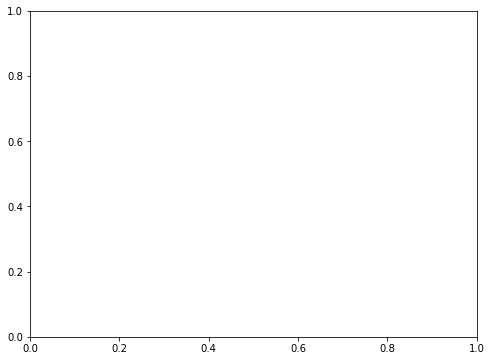

In [2]:
fig, ax = plt.subplots(figsize=(8, 6))
multHVA = 2
threshList = []
multList = []
shift = -30
g = 1
dendcur = 0.64
for i in range(0, 1):
    all_secs = list(L5PC.all)
    for sec in all_secs:
        for seg in sec:
            try: seg.Ih.vshift = seg.Ih.vshift + shift
#             try: seg.Ca_HVA.gCa_HVAbar = seg.Ca_HVA.gCa_HVAbar*multHVA
            except AttributeError: continue
    for i in range(0, 19):
        for sec in all_secs:
            for seg in sec:
#                 try: seg.Ih.vshift = seg.Ih.vshift + shift
                try: seg.Ca_HVA.gCa_HVAbar = seg.Ca_HVA.gCa_HVAbar*multHVA
                except AttributeError: continue            
#         dendcur = 0.81
        NoCaSpike = True
        while NoCaSpike:
            t = h.Vector().record(h._ref_t)
            som_v = h.Vector().record(L5PC.soma[0](0.5)._ref_v)
            distal_v = h.Vector().record(L5PC.apic[36](0.9)._ref_v)
            proximal_v = h.Vector().record(L5PC.apic[20](0.5)._ref_v)
            distal_ca = h.Vector().record(L5PC.apic[36](0.9).Ca_HVA._ref_ica)

            current_epsp = h.epsp(L5PC.apic[36](0.9))
            current_epsp.tau0 = 0.6
            current_epsp.tau1 = 7
            current_epsp.imax = dendcur
            current_epsp.onset = 205

            current_som = h.IClamp(L5PC.soma[0](0.5))
            current_som.delay = 200
            current_som.dur = 5 
            current_som.amp = 1.9

            soma_cur = h.Vector().record(current_som._ref_i)
            cur_i = h.Vector().record(current_epsp._ref_i)
            prox_v = h.Vector().record(L5PC.apic[20](0.9)._ref_v)
            v_rest = -80.28
            h.finitialize(v_rest*mV)
            h.continuerun(250*ms)

            mincahva = min(distal_ca)
#             maxsoma = max(som_v)
    #         maxP = max(prox_v)
    #         print(shift, maxP)
    #         shift = shift - 5

            if mincahva < - 0.01:
#             if maxsoma > 10:
                threshList.append(dendcur)
                multList.append(multHVA)
                print(g, dendcur)
                for sec in all_secs:
                    for seg in sec:
#                         try: seg.Ih.vshift = seg.Ih.vshift - shift
                        try: seg.Ca_HVA.gCa_HVAbar = seg.Ca_HVA.gCa_HVAbar/multHVA
                        except AttributeError: continue
                multHVA = multHVA-0.1
                NoCaSpike = False
#                 shift = shift - 5
                g+=1

            else:
                dendcur = dendcur + 0.01
    for sec in all_secs:
        for seg in sec:
            try: seg.Ih.vshift = seg.Ih.vshift / shift
#             try: seg.Ca_HVA.gCa_HVAbar = seg.Ca_HVA.gCa_HVAbar/multHVA
            except AttributeError: continue                  
            
# ax.plot(multList, threshList,'k', linewidth=2.5)
# ax.set(ylabel='Threshohld to evoke Ca spike - input to nexus', xlabel='HVA_CA conductance multiplyer', ylim=(0,0.35))
# ax.set_title('Input to soma and nexus', fontsize=16)